<a href="https://colab.research.google.com/github/sonivarun01/ai-ml-colab-projects/blob/main/SOM_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install minisom

In [ ]:
dataset = pd.read_csv('sample_data/Credit_Card_Applications.csv')

In [ ]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

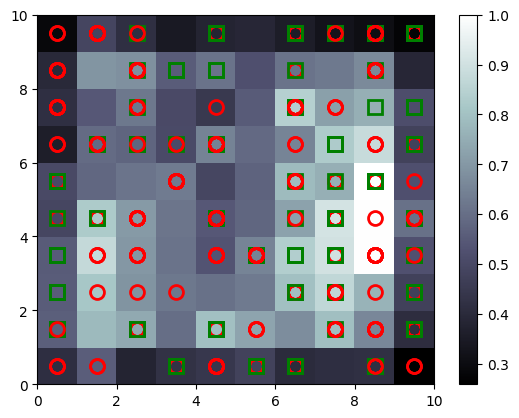

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize= 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate([np.atleast_2d(mappings[key]) for key in [(4,7), (7,7)] if key in mappings], axis=0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5600027e+07 1.0000000e+00 2.9830000e+01 2.0400000e+00 1.0000000e+00
  1.4000000e+01 8.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2800000e+02 2.0000000e+00]
 [1.5815271e+07 1.0000000e+00 2.7580000e+01 3.2500000e+00 1.0000000e+00
  1.1000000e+01 8.0000000e+00 5.0850000e+00 0.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 3.6900000e+02 2.0000000e+00]
 [1.5789865e+07 1.0000000e+00 1.8170000e+01 2.4600000e+00 2.0000000e+00
  8.0000000e+00 7.0000000e+00 9.6000000e-01 0.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 1.6000000e+02 5.8800000e+02]
 [1.5810716e+07 1.0000000e+00 2.3500000e+01 3.1650000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 4.1500000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 8.1000000e+01]]


In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(frauds)


Fraud Customer IDs
[[1.5600027e+07 1.0000000e+00 2.9830000e+01 2.0400000e+00 1.0000000e+00
  1.4000000e+01 8.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2800000e+02 2.0000000e+00]
 [1.5815271e+07 1.0000000e+00 2.7580000e+01 3.2500000e+00 1.0000000e+00
  1.1000000e+01 8.0000000e+00 5.0850000e+00 0.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 3.6900000e+02 2.0000000e+00]
 [1.5789865e+07 1.0000000e+00 1.8170000e+01 2.4600000e+00 2.0000000e+00
  8.0000000e+00 7.0000000e+00 9.6000000e-01 0.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 1.6000000e+02 5.8800000e+02]
 [1.5810716e+07 1.0000000e+00 2.3500000e+01 3.1650000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 4.1500000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 8.1000000e+01]]
[[1.5600027e+07 1.0000000e+00 2.9830000e+01 2.0400000e+00 1.0000000e+00
  1.4000000e+01 8.0000000e+00 4.0000000e

In [ ]:
customers = dataset.iloc[:, 1:].values
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(customers, is_fraud, batch_size=1, epochs=10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2552 - loss: 1.3501
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.5379
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.3126
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.2098
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.1453
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.1122
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0919
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9972 - loss: 0.0663
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0624
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0590


In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
print(y_pred)

[[1.57484990e+07 3.11184097e-02]
 [1.56305920e+07 3.11184097e-02]
 [1.56366260e+07 3.11184097e-02]
 ...
 [1.57906890e+07 3.73940319e-02]
 [1.56572280e+07 3.83975022e-02]
 [1.57898650e+07 4.23682109e-02]]
